# Mentoría

## Introduccion al Aprendizaje Automático

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el tercer práctico del proyecto, correspondiente a la materia Introducción al Aprendizaje Automático. El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

En el caso de nuestro proyecto, nos enfrentamos originalmente a un problema de prediccion ----------------. Sin embargo, a los fines de este práctico, lo transformaremos en un problema de clasificación binario, adaptando las el feature objetivo del dataset. Además, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.


### Importaciones

In [2]:
# Importación de las librerías necesarias
# pablo
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc, plot_roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold, TimeSeriesSplit
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)  # Para mayor determinismo

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Introducción al Aprendizaje Automático

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original.La división entre train y test será realizada en este mismo práctico. A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

1. Obtención del Dataset

Cargar el conjunto de entrenamiento original.

2. Aplicar Script de Curación

Inicialmente, luego de haber unido ambos datasets, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el práctico anterior. En esta etapa, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable Target.

3. Dataset para Problema de Clasificación Binario

Si bien nuestro problema original implica predecir una variable Real, es decir una regresión, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:

- 1 = Hay distribución de energía (Kw 3 fases > 100)
- 0 = No hay distribución de energía  (Kw 3 fases <= 100)

Es decir, queremos diferenciar los momentos en que hay cortes en la distribucion de energia de los que no hay. En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.
¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

4. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización?

Aplicar a los datasets la normalización de atributos que consideren adecuada.

5. Mezcla Aleatória y División en Train/Test

Finalmente, están en condiciones de dividir el dataset en Train y Test, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente. De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: X_train, X_test, y_train y y_test.


6. Division en Train/Test (opcional)

En muchos de los problemas de series temporales la variable objetivo está muy ligada al momento en la cual se la mide. Es por esto que se suele adoptar diferentes estrategias para la división de los dataset de de entrenamiento y test. 

La opción más frecuente es dividirlos en subconjuntos ordenados por el tiempo, de manera que el dataset de entrenamiento sea anterior al de test.

Prueben realizar esta división y ejecutar los mismos modelos para poder comparar resultados sobre las métricas obtenidas.

https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/


A modo de ayuda, en esta notebook encontrarán una especie de template que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un proceso circular, continuo y no lineal. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Clasificación

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación para ambos datasets, utilizando la librería Scikit-Learn:

    Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
    K Nearest Neighbors ó K Vecinos Más Cercanos
    Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)

Para cada uno de ellos, se pide responder las siguientes consignas:

    Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
    Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
    Obtener accuracy o exactitud.

De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:
1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?
2. Selección de Regularizador

¿Utilizarán algún regularizador?¿Cuál?
3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?
4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

    Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.
    Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
        Accuracy o exactitud
        Reporte de clasificación
        Confusion matrix o matriz de confusión (graficar como heatmap)
        Curva ROC y área bajo la curva (AUC).

## Entregables


### I. Preprocesamiento

El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.


In [4]:
# Si estamos en Colab se debe descargar el script porque es borrado cada vez que el entorno se desconecta.
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  !wget https://raw.githubusercontent.com/leorebola/diplodatos/master/practicos/TP3/curacion_dataset.py

--2020-08-27 03:11:27--  https://raw.githubusercontent.com/leorebola/diplodatos/master/practicos/TP3/curacion_dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16774 (16K) [text/plain]
Saving to: ‘curacion_dataset.py’

curacion_dataset.py 100%[===================>]  16.38K  --.-KB/s    in 0.006s  

2020-08-27 03:11:27 (2.56 MB/s) - ‘curacion_dataset.py’ saved [16774/16774]



In [5]:
# Importamos el script de curación y merge de datasets 
from curacion_dataset import get_ds

ENERGIA_DS_URL = 'https://raw.githubusercontent.com/alaain04/diplodatos/master/data/energia_completo.csv'
CLIMA_DS_URL = 'https://raw.githubusercontent.com/alaain04/diplodatos/master/data/clima_posadas_20192020.csv'

In [6]:
# Ejecutamos el script
ds = get_ds(ENERGIA_DS_URL, CLIMA_DS_URL)
ds.columns = ['fecha', 'ta','sa','ra','vab','vca','vbc','kwatts','potencia', 'temperature', 'windspeed']

2020-08-27 03:11:33 Tipo de dato no esperado para: Amper fase T-A -> int64
2020-08-27 03:11:33 Tipo de dato no esperado para: Amper fase S-A -> int64
2020-08-27 03:11:33 Tipo de dato no esperado para: Amper fase R-A -> int64
2020-08-27 03:11:33 Dataset Clima importado correctamente
2020-08-27 03:11:33 Verificacion de Fecha y Hora únicas: OK
2020-08-27 03:11:33 Resumen de valores nulos para dataset Clima
2020-08-27 03:11:33 Cantidad de valores nulos en la columna: time__________________________ 0_________ 0.0%
2020-08-27 03:11:33 Cantidad de valores nulos en la columna: temperature___________________ 0_________ 0.0%
2020-08-27 03:11:33 Cantidad de valores nulos en la columna: windspeed_____________________ 1_________ 0.01%

2020-08-27 03:11:33 Resumen de valores nulos para dataset Energia
2020-08-27 03:11:33 Cantidad de valores nulos en la columna: Amper fase T-A________________ 0_________ 0.0%
2020-08-27 03:11:33 Cantidad de valores nulos en la columna: Amper fase S-A________________ 0

In [7]:
ds['suministro'] = ds[ds.kwatts.notnull()].kwatts.apply(lambda x: 1 if x > 100 else 0)

In [8]:
print('Suministro cortado: {:0.5f}%'.format(len(ds[ds.suministro == 0]) / len(ds)))
print('Suministro normal: {:0.5f}%'.format(len(ds[ds.suministro == 1]) / len(ds)))

Suministro cortado: 0.00776%
Suministro normal: 0.89020%


## II. Aplicación de Modelos de Clasificación

In [9]:
TIMESERIESSPLIT="TimeSeries"
STRATIFIEDKFOLD="StratifiedKFold"
KFOLD="KFold"

estrategia = TIMESERIESSPLIT

In [10]:
# se eliminan las filas donde hay valores NaN
ds_onlynum = ds.dropna()
display(ds_onlynum)

,fecha,ta,sa,ra,vab,vca,vbc,kwatts,potencia,temperature,windspeed,suministro
4,2019-12-03 21:05:00,10.00,10.00,11.00,35.78,36.54,0.00,4342.00,0.00,31.09,12.55,1.00
5,2019-12-03 21:10:00,11.00,11.00,11.00,0.00,0.00,35.95,0.00,0.93,31.07,12.11,0.00
6,2019-12-03 21:15:00,11.00,11.00,11.00,0.00,36.63,36.02,0.00,0.00,31.04,11.68,0.00
7,2019-12-03 21:20:00,11.00,11.00,11.00,0.00,0.00,0.00,4423.00,0.00,31.00,11.27,1.00
8,2019-12-03 21:25:00,11.00,10.00,11.00,35.83,36.90,36.27,4296.00,0.00,30.95,10.88,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
65496,2020-08-02 20:15:00,52.00,58.00,61.00,36.38,37.26,36.45,3592.00,0.96,28.63,16.47,1.00
65497,2020-08-02 20:20:00,53.00,58.00,61.00,36.24,37.19,36.39,3524.00,0.96,28.52,16.93,1.00
65498,2020-08-02 20:25:00,51.00,57.00,60.00,36.27,37.17,36.41,3492.00,0.96,28.41,17.36,1.00
65499,2020-08-02 20:30:00,52.00,57.00,61.00,36.29,37.20,36.48,3548.00,0.96,28.31,17.75,1.00


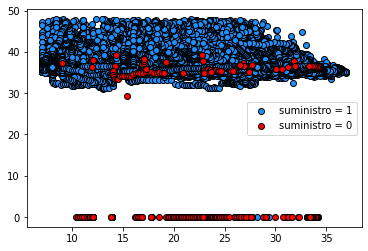

In [11]:
# features a elegir
feat1 = 'temperature'
feat2 = 'vab'
target = 'suministro'

plt.scatter(ds_onlynum[ds_onlynum[target]==1][feat1],ds_onlynum[ds_onlynum[target]==1][feat2], facecolor="dodgerblue", edgecolor="k", label='suministro = 1')
plt.scatter(ds_onlynum[ds_onlynum[target]==0][feat1],ds_onlynum[ds_onlynum[target]==0][feat2], facecolor="red", edgecolor="k", label='suministro = 0')
plt.legend()
plt.show()

In [12]:
# funcion de ploteo de regiones de decision
def plot_decision_boundary(model, X, y):
    X = X.T
    y = y.T

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)
    plt.scatter(X[0, y==1], X[1, y==1], color="dodgerblue", edgecolors='k', label="1")
    plt.scatter(X[0, y==0], X[1, y==0], color="tomato", edgecolors='k', label="0")
    plt.legend()

In [14]:
# Creo los sets de entrenamiento y evaluación
X, y = ds_onlynum[[feat1,feat2]], ds_onlynum[target]
XX = X.to_numpy()
yy = y.to_numpy()

train_size = 0.8
random_state = 0


# Seleccionar el método para separar conjuntos de entrenamiento y evaluación

if estrategia == TIMESERIESSPLIT:
  # Usando TimeSeriesSplit
  train_size = int(len(XX) * train_size)
  X_train, X_test, y_train, y_test = XX[0:train_size], X[train_size:len(XX)], y[0:train_size], y[train_size:len(XX)]
else:
  # Mezcla aleatoria de datos
  X_train, X_test, y_train, y_test = train_test_split(XX,yy,train_size=train_size,random_state=random_state,shuffle=True)


In [15]:
# Estandarizamos los datos en función del conjunto de entrenamiento
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

accuracy: 85.27%


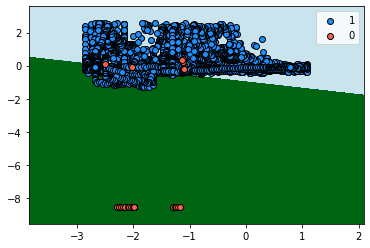

In [16]:
# Método de perceptron
# Podemos utilizar el algoritmo Perceptron() o SGDCLassifier() setenado los parámetros de manera que sean equivalentes

sgdc = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state = random_state)
sgdc.fit(X_train_std,y_train)

random_state = 0
ppn = Perceptron(random_state=random_state)
ppn.fit(X_train_std,y_train)

y_pred_ppn = ppn.predict(X_test_std)     
# Calculamos accuracy y ploteo de la frontera de desición
print('accuracy: {0:.2f}%'.format(accuracy_score(y_test,y_pred_ppn)*100))
plot_decision_boundary(lambda x: ppn.predict(x), X_test_std,y_test)

accuracy: 99.33%


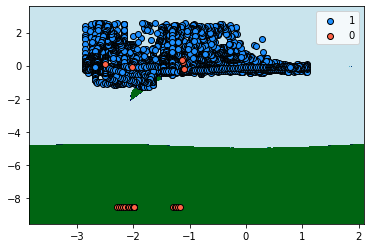

In [17]:
# Método de k-nearest neighbors

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_std,y_train)

y_pred_neigh = neigh.predict(X_test_std)
# Calculamos accuracy y ploteo de la frontera de desición
print('accuracy: {0:.2f}%'.format(accuracy_score(y_test,y_pred_neigh)*100))
plot_decision_boundary(lambda x: neigh.predict(x), X_test_std,y_test)

accuracy: 99.92%


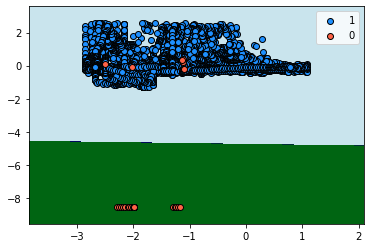

In [19]:
# Método de logistic regression
# Podemos implementar el algoritmo de LogisticRegression o aplicar la función de costo logística en el algoritmo SGDClassifier()

sgdc_log = SGDClassifier(loss='log', random_state = random_state)
sgdc_log.fit(X_train_std,y_train)

y_pred_sgdclog = sgdc_log.predict(X_test_std)
print('accuracy: {0:.2f}%'.format(accuracy_score(y_test,y_pred_sgdclog)*100))
plot_decision_boundary(lambda x: sgdc_log.predict(x), X_test_std,y_test)

Se pide responder las siguientes consignas:

    Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
    Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
    Obtener accuracy o exactitud.



> Se eligieron como features a analizar la corriente y tensión de una de las fases (asuminos que no es la idea utilizar los datos de la potencia como feature ya que esos son los que usamos para crear la clasificación). Sobre el vector de Bias, en el caso del modelo de perceptron y regresión logística se agrega por default este vector, es necesario en caso de que los datos no estén centrados. Se realizó el cálculo de accuracy para cada uno de los métodos aplicados.


    De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

    Elegir el modelo que consideren que mejor aplica a nuestro problema. Para ello, recuerden que
    los pasos a seguir en la selección pueden esquematizarse como sigue:
    
    1. Descripción de la Hipótesis

    ¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

> Queremos clasificar si hay un corte en el suministro de energía en función de 2 features del dataset. Suponemos la hipótesis es que si uno de los valores de las variables se encuentra por muy por debajo de la media representa un corte del suminsitro.

    2. Selección de Regularizador
    ¿Utilizarán algún regularizador?¿Cuál?

> Para los métodos de perceptron y regresión logística se pueden utilizar regularizaciones del tipo l1, l2 o combinación de ambas. Por default el método de perceptron no utiliza ninguna y la reg. log. utiliza l2. 

    3. Selección de Función de Costo
    ¿Cuál será la función de costo utilizada?

> Creemos que la función de costo a elegir para nuestro caso sería la regresión logística, implementada con SGD.

    4. Justificación de las Selecciones
    ¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

> Ya que es un problema de clasificación binaria y por los datos que tenemos pensamos que el método de regresión logistica sería el método a elegir. Ya que el método de K-neighbors es lento para muchos datos y más eficiente para problemas multiclases, además por como es nuestro conjunto de datos puede generar fronteras de desición con problemas y el método de perceptron básico sabemos que converge cuando los datos son linealmente separables. Además usamos el algoritmo de SGDClassifier con función de costo logistica en lugar de la implementación LogisticRegression() ya que esta última por defecto usa un algoritmo de Gradient Descent que aunque puede dar mejores resultados en general se vuelve costoso para problemas de gran escala.

In [22]:
# Definiciones de hiper parametros
param_grid = {
    'loss': [ # The loss function to be used. Defaults to 'hinge'
        'log',          # logistic regression
    ],
    'penalty': ['l1','l2','None'],
    'eta0': [1,1e-1,1e-2,1e-5,1e-9], # The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.0 as eta0 is not used by the default schedule ‘optimal’
    'alpha': [1e-6,1e-5,1e-4,1e-3], # Constant that multiplies the regularization term. Default = 1e-4
    'learning_rate': [ # The learning rate schedule. Defaults to 'optimal'
        'constant',
        'optimal',
        'invscaling',
        'adaptive'
    ]
}

# Seteamos el numero de subconjuntos del conjunto de entrenamiento y el iterador a usar
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
# Estrategias propuestas a usar son K-fold, Stratified k-fold y Time Series Split

n_sets = 3
# Estrategias para datos mezclados aleatoriamente

if estrategia == TIMESERIESSPLIT:
  iterator = TimeSeriesSplit(n_splits=n_sets) 
elif estrategia == STRATIFIEDKFOLD:
  iterator = StratifiedKFold(n_splits=n_sets)
else:
  iterator = KFold(n_splits=n_sets)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.04,0.02,0.00,0.00,0.00,1,constant,log,l1,"{'alpha': 1e-06, 'eta0': 1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l1'}",1.00,1.00,0.99,1.00,0.00,2
1,0.03,0.02,0.00,0.00,0.00,1,constant,log,l2,"{'alpha': 1e-06, 'eta0': 1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l2'}",1.00,1.00,0.99,1.00,0.00,2
2,0.03,0.02,0.00,0.00,0.00,1,constant,log,None,"{'alpha': 1e-06, 'eta0': 1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'None'}",1.00,1.00,0.99,1.00,0.00,2
3,0.14,0.06,0.00,0.00,0.00,1,optimal,log,l1,"{'alpha': 1e-06, 'eta0': 1, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l1'}",1.00,1.00,0.99,1.00,0.00,2
4,0.10,0.04,0.00,0.00,0.00,1,optimal,log,l2,"{'alpha': 1e-06, 'eta0': 1, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}",1.00,1.00,0.99,1.00,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.04,0.02,0.00,0.00,0.00,0.00,invscaling,log,l2,"{'alpha': 0.001, 'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log', 'penalty': 'l2'}",1.00,0.97,0.99,0.99,0.01,231
236,0.04,0.01,0.00,0.00,0.00,0.00,invscaling,log,None,"{'alpha': 0.001, 'eta0': 1e-09, 'learning_rate': 'invscaling', 'loss': 'log', 'penalty': 'None'}",1.00,0.97,0.99,0.99,0.01,231
237,0.03,0.01,0.00,0.00,0.00,0.00,adaptive,log,l1,"{'alpha': 0.001, 'eta0': 1e-09, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l1'}",1.00,0.97,0.99,0.99,0.01,193
238,0.03,0.01,0.00,0.00,0.00,0.00,adaptive,log,l2,"{'alpha': 0.001, 'eta0': 1e-09, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'l2'}",1.00,0.97,0.99,0.99,0.01,197


Mejor Modelo
 SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Mejores Parametros
 {'alpha': 0.001, 'eta0': 1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l2'}
accuracy: 95.35%


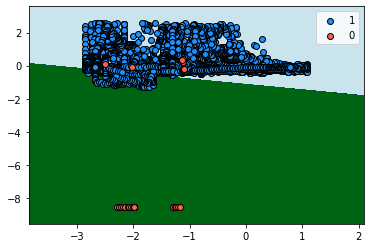

In [23]:
# Grid Search para el clasificador SGDC para el análisis de los hiperparámetros
model = SGDClassifier(random_state = random_state)
cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=iterator)
cv.fit(X_train_std, y_train)

results = cv.cv_results_    
df_result = pd.DataFrame(results)
display(df_result)

best_model = cv.best_estimator_
bestpar = cv.best_params_

print('Mejor Modelo\n', best_model)
print('Mejores Parametros\n', bestpar)

y_pred = best_model.predict(X_test_std)
print('accuracy: {0:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
plot_decision_boundary(lambda x: best_model.predict(x), X_test_std,y_test)

In [24]:
# Calculamos la métricas del modelo obtenido mediante el método de GridSearch con CV midiendo accuracy para el conjunto de test
print('Estrategia para CV usada: \n', iterator)
print('Valores de "accuracy" mediante Cross Validation:')
CVscoring = cross_val_score(best_model, X_test_std, y_test, scoring='accuracy', cv=iterator)
print(CVscoring)

print('Valor medio de "accuracy":')
print(CVscoring.mean())

Estrategia para CV usada: 
 TimeSeriesSplit(max_train_size=None, n_splits=3)
Valores de "accuracy" mediante Cross Validation:
[1.         1.         0.99954525]
Valor medio de "accuracy":
0.9998484159466424


In [25]:
#  Classification report para el conjunto de test
target_names = ['suministro = 0', 'suministro = 1']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

suministro = 0       0.07      0.81      0.12        36
suministro = 1       1.00      0.95      0.98      8762

      accuracy                           0.95      8798
     macro avg       0.53      0.88      0.55      8798
  weighted avg       1.00      0.95      0.97      8798



Matriz de confusión:
[[  29    7]
 [ 402 8360]]


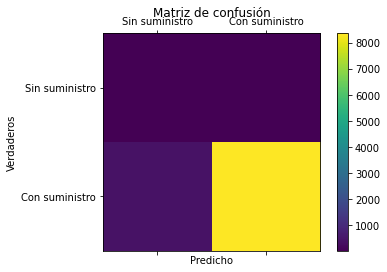

In [26]:
# Cálculo de la matriz de confusión y 

labels = ['Sin suministro', 'Con suministro']
cm = confusion_matrix(y_test, y_pred)

print('Matriz de confusión:')
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de confusión')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdaderos')
plt.show()

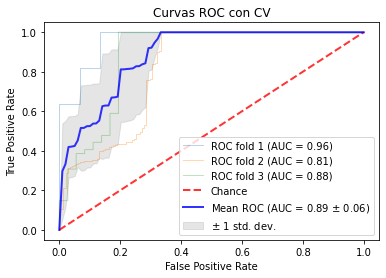

In [27]:
# Ploteo de la curva ROC y cálculo del valor AUC
#  Analizamos el modelo obtenido mediante GridSearchCV y aplicamos Stratified K-Folds cross-validator 
#  para obtener 5 curvas ROC para estos nuevos conjuntos generados y calcular su media

X, y = ds_onlynum[[feat1,feat2]], ds_onlynum[target]

X = X.to_numpy()
y = y.to_numpy()

sc = StandardScaler()
sc.fit(X_train)
X = sc.transform(X)

classifier = cv.best_estimator_

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(iterator.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i+1),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Curvas ROC con CV")
ax.legend(loc="lower right")
plt.show()
